In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [2]:
car_data = pd.read_csv("car_data_small.csv")
car_data.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [3]:
print(car_data.shape)
car_data.info()

(301, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
for col in car_data.columns:
    if car_data[col].dtype == 'O':
        print(col,":",car_data[col].unique())
        print()

Car_Name : ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' '

In [5]:
car_data.drop(columns=["Car_Name"], inplace=True)

### Data Preprocessing

In [6]:
import datetime
present_year = datetime.datetime.now().year

car_data["Age"] = car_data["Year"].apply(lambda x : present_year - x)
car_data.drop(columns=["Year"], inplace=True)

In [7]:
car_data = pd.get_dummies(car_data, drop_first=True)
car_data.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1


In [8]:
X = car_data.drop(columns=["Selling_Price"])
y = car_data["Selling_Price"]

print(f"Shapes X:{X.shape} , y:{y.shape}")

Shapes X:(301, 8) , y:(301,)


### Outlier Analysis

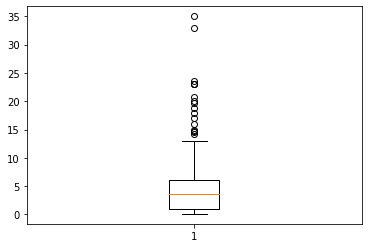

In [9]:
plt.boxplot(car_data['Selling_Price'])
plt.show()

In [10]:
from scipy.stats import zscore

car_data['zscores'] = zscore(car_data['Selling_Price'])
car_data[(car_data.zscores > 3.0) | (car_data.zscores < -3.0)]

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,zscores
51,23.00,30.61,40000,0,7,1,0,0,0,3.613993
59,19.99,35.96,41000,0,8,1,0,0,0,3.020815
63,23.50,35.96,47000,0,7,1,0,0,0,3.712527
64,33.00,36.23,6000,0,5,1,0,0,0,5.584684
82,23.00,25.39,15000,0,5,1,0,0,0,3.613993
86,35.00,92.60,78000,0,12,1,0,0,1,5.978822
93,23.00,30.61,40000,0,7,1,0,0,0,3.613993
96,20.75,25.39,29000,0,6,1,0,0,0,3.170587


We have to understand these outliers to remove them

### Multicollinearity

<AxesSubplot:>

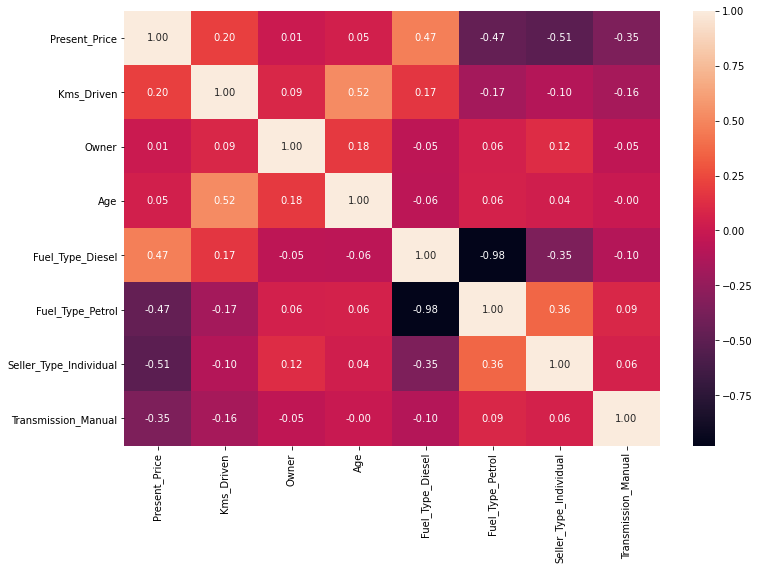

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot=True, fmt=".2f")

In [12]:
X = sm.add_constant(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### Base Model
#### Model Creation

In [14]:
model_1 = sm.OLS(y_train, X_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     259.9
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          6.28e-111
Time:                        15:28:16   Log-Likelihood:                -454.05
No. Observations:                 240   AIC:                             926.1
Df Residuals:                     231   BIC:                             957.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.8586      1.721      3.405      0.001       2.469       9.249
Present_Price              0.4101      0.016     25.957      0.000       0.379       0.441
Kms_Driven             -4.929e-06   3.07e-06     -1.604      0.110    -1.1e-05    1.13e-06
Owner                      0.5922      0.596      0.993      0.322      -0.583       1.767
Age                       -0.3891      0.043     -9.008      0.000      -0.474      -0.304
Fuel_Type_Diesel           2.4814      1.663      1.492      0.137      -0.796       5.759
Fuel_Type_Petrol           0.4708      1.647      0.286      0.775      -2.773       3.715
Seller_Type_Individual    -1.2325      0.263     -4.694      0.000      -1.750      -0.715
Transmission_Manual       -1.5562      0.322     -4.837      0.000      -2.190      -0.922
==============================================================================
Omnibus:                       31.231   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.167
Skew:                           0.507   Prob(JB):                     2.16e-21
Kurtosis:                       5.914   Cond. No.                     1.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Removing insignificant features

In [15]:
selected_cols = ['const', 'Present_Price','Age','Seller_Type_Individual','Transmission_Manual']
model_2 = sm.OLS(y_train, X_train[selected_cols]).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     436.7
Date:                Sat, 22 Jan 2022   Prob (F-statistic):          1.66e-107
Time:                        15:28:19   Log-Likelihood:                -474.50
No. Observations:                 240   AIC:                             959.0
Df Residuals:                     235   BIC:                             976.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.6464      0.505     13.153      0.000       5.651       7.642
Present_Price              0.4485      0.016     28.659      0.000       0.418       0.479
Age                       -0.4498      0.039    -11.420      0.000      -0.527      -0.372
Seller_Type_Individual    -1.3938      0.280     -4.971      0.000      -1.946      -0.841
Transmission_Manual       -1.3220      0.342     -3.867      0.000      -1.995      -0.648
==============================================================================
Omnibus:                       37.724   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.488
Skew:                           0.473   Prob(JB):                     4.74e-39
Kurtosis:                       7.093   Cond. No.                         68.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Validation
##### Checking for Normal Distribution of Residuals
If residuals are normally distributed, then the blue line and red line should coinside with each other

<Figure size 504x432 with 0 Axes>

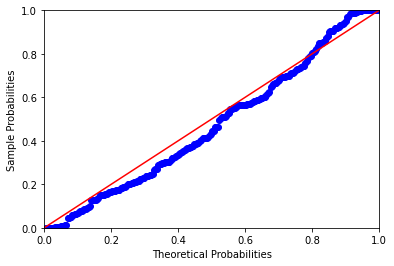

In [16]:
probplot = sm.ProbPlot(model_2.resid)
plt.figure(figsize=(7,6))
probplot.ppplot(line='45')
plt.show()

##### Checking for Homoscedasticity  
Result should be no presence of pattern in scatterplot. We can see here that scatterplot is concentrated in perticular area but doesn't have pattern.
Ideally scatter points could be further scattered apparat suggesting no pattern.

In [17]:
#To bring everything on same scale
def get_standard_values(col):
    return (col - col.mean())/ col.std()

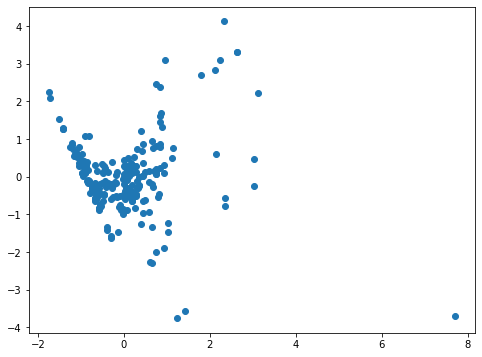

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(get_standard_values(model_2.fittedvalues), get_standard_values(model_2.resid))
plt.show()

#### Predictions

In [19]:
y_pred = model_2.predict(X_test[selected_cols])
y_pred

199   -2.556887
201    2.971566
111    1.904332
125   -1.132460
46     3.468964
         ...   
283    7.917589
104    2.340722
255    3.225426
19     3.505274
200   -2.930488
Length: 61, dtype: float64

In [20]:
from sklearn import metrics
scores = {}
print("RMSE:" ,np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("R-sq:", np.round(metrics.r2_score(y_pred,y_test), 3))

scores["model1"] = {"RMSE": np.sqrt(metrics.mean_squared_error(y_pred,y_test)), 
                   "RSq":np.round(metrics.r2_score(y_pred,y_test), 3),
                   "Remark":"Base Model"}

RMSE: 2.300168792017756
R-sq: 0.601


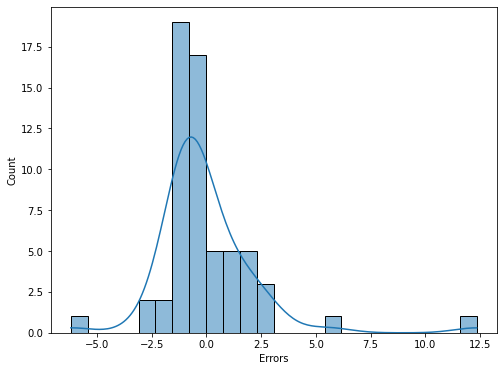

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel("Errors")
plt.show()

So errors are also normally distributed

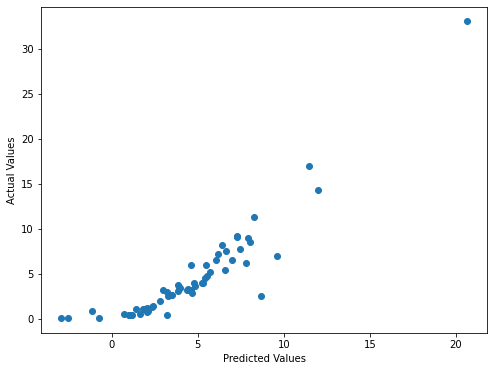

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

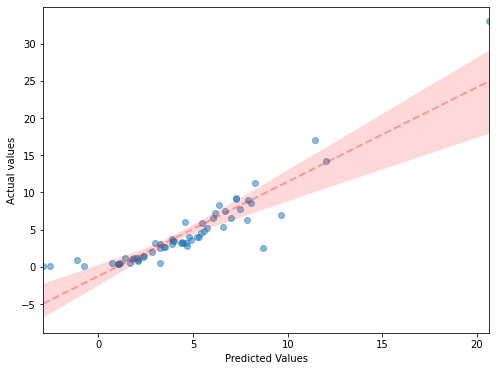

In [24]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_pred, y= y_test, 
            line_kws={
               'color':'r', 'alpha':0.3, 'linestyle':'--', 'linewidth':2 
            },
           scatter_kws={
               'alpha':0.5
           }
           )
plt.xlabel("Predicted Values")
plt.ylabel("Actual values")
plt.show()

### Model Tuning
#### Dropping Outliers

In [25]:
car_data.drop(car_data[(car_data.zscores > 3.0) | (car_data.zscores < -3.0)].index, inplace=True)

In [26]:
X = car_data.drop(columns=['Selling_Price','zscores'])
y = car_data['Selling_Price']

print(f"Shapes: X{X.shape} , y{y.shape}")

Shapes: X(293, 8) , y(293,)


<AxesSubplot:>

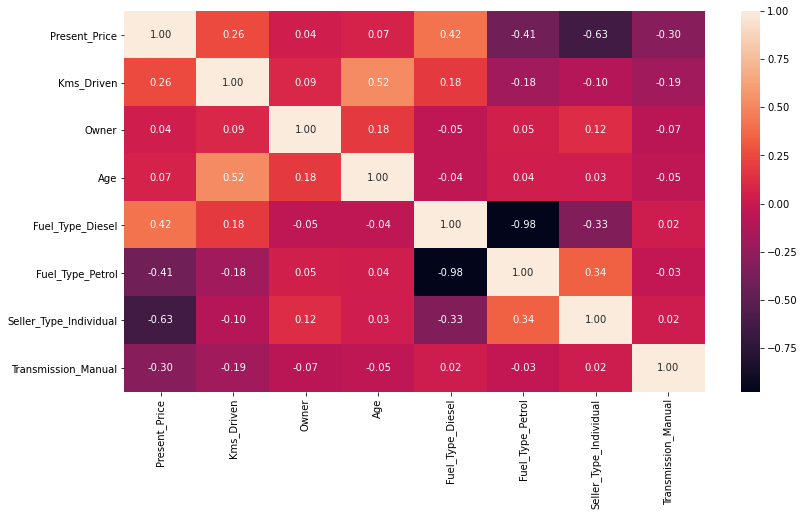

In [27]:
plt.figure(figsize=(13,7))
sns.heatmap(X.corr(), annot=True, fmt=".2f")

In [28]:
#Dropping Fuel_Type_Diesel due to high correlation with Fuel_Type_Petrol
X.drop(columns=["Fuel_Type_Diesel"], inplace=True)

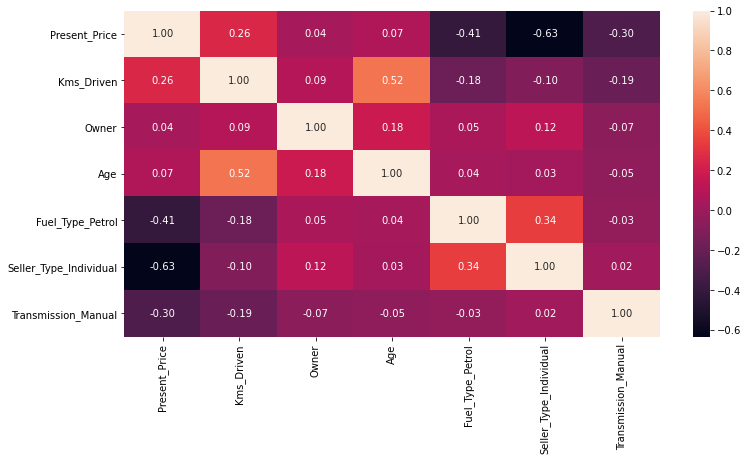

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(X.corr(), annot=True, fmt=".2f")
plt.show()

#### Train Test Split

In [30]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [31]:
model_3 = sm.OLS(y_train, X_train).fit()

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     174.0
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           2.68e-87
Time:                        15:31:49   Log-Likelihood:                -422.69
No. Observations:                 234   AIC:                             861.4
Df Residuals:                     226   BIC:                             889.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.7422      0.594      9.659      0.000       4.571       6.914
Present_Price              0.4632      0.025     18.637      0.000       0.414       0.512
Kms_Driven             -4.144e-06   2.97e-06     -1.394      0.165      -1e-05    1.71e-06
Owner                     -0.7410      0.374     -1.984      0.049      -1.477      -0.005
Age                       -0.3655      0.039     -9.412      0.000      -0.442      -0.289
Fuel_Type_Petrol          -1.1242      0.288     -3.908      0.000      -1.691      -0.557
Seller_Type_Individual    -0.9785      0.280     -3.489      0.001      -1.531      -0.426
Transmission_Manual       -0.2339      0.332     -0.704      0.482      -0.888       0.421
==============================================================================
Omnibus:                       40.031   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.541
Skew:                           0.603   Prob(JB):                     6.17e-35
Kurtosis:                       6.835   Cond. No.                     3.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Removing Insignificant features

In [32]:
selected_cols = ["const","Present_Price","Owner","Age","Fuel_Type_Petrol","Seller_Type_Individual"]
model_4 = sm.OLS(y_train, X_train[selected_cols]).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     243.0
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           3.21e-89
Time:                        15:31:54   Log-Likelihood:                -423.80
No. Observations:                 234   AIC:                             859.6
Df Residuals:                     228   BIC:                             880.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.5286      0.429     12.895      0.000       4.684       6.373
Present_Price              0.4642      0.023     20.166      0.000       0.419       0.510
Owner                     -0.7365      0.374     -1.971      0.050      -1.473      -0.000
Age                       -0.3938      0.033    -11.906      0.000      -0.459      -0.329
Fuel_Type_Petrol          -1.0259      0.278     -3.688      0.000      -1.574      -0.478
Seller_Type_Individual    -0.9575      0.275     -3.482      0.001      -1.499      -0.416
==============================================================================
Omnibus:                       41.469   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.673
Skew:                           0.644   Prob(JB):                     5.78e-35
Kurtosis:                       6.810   Cond. No.                         58.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Validation
##### Checking for Normal Distribution of Residuals

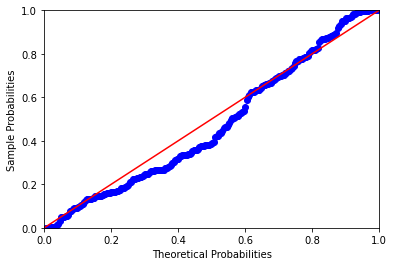

In [33]:
probplot = sm.ProbPlot(model_4.resid)
probplot.ppplot(line='45')
plt.show()

##### Homoscedasticity

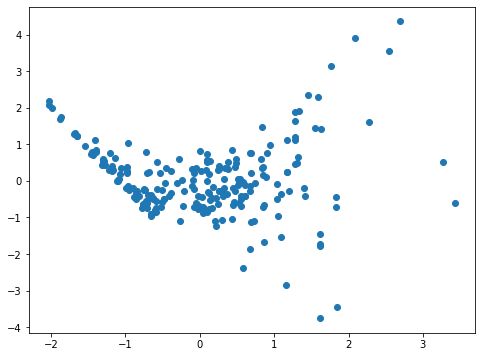

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(get_standard_values(model_4.fittedvalues), get_standard_values(model_4.resid))
plt.show()

#### Predictions

In [35]:
y_pred = model_4.predict(X_test[selected_cols])

In [36]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print("R-sq: ", metrics.r2_score(y_pred, y_test))

scores["model5"] = {"RMSE": np.sqrt(metrics.mean_squared_error(y_pred, y_test)),
                   "RSq" : metrics.r2_score(y_pred, y_test),
                   "Remark": "Model after removing outliers v1"}

RMSE:  1.1875466128525605
R-sq:  0.895227914615401


<AxesSubplot:ylabel='Count'>

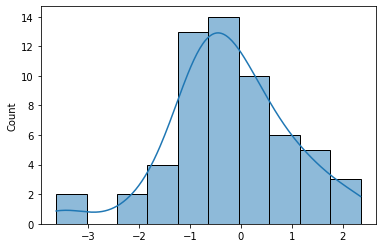

In [37]:
sns.histplot(y_test - y_pred, kde=True)

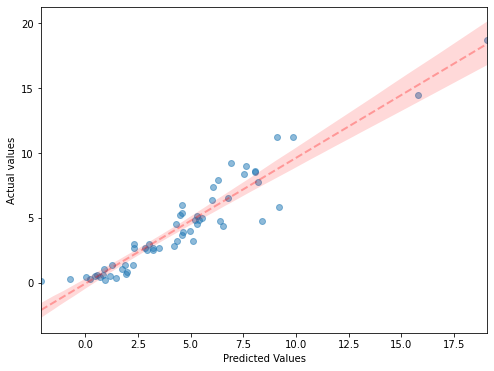

In [39]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_pred, y= y_test, 
            line_kws={
               'color':'r', 'alpha':0.3, 'linestyle':'--', 'linewidth':2 
            },
           scatter_kws={
               'alpha':0.5
           }
           )
plt.xlabel("Predicted Values")
plt.ylabel("Actual values")
plt.show()

In [38]:
pd.DataFrame(scores).T

,RMSE,RSq,Remark
model1,2.300169,0.601,Base Model
model5,1.187547,0.895228,Model after removing outliers v1


We can see that R-sq has significantly increased, and RMSE has significantly decreased. So we can see a good jump in our model performance.  

*Note*: "Model after removing outliers" was recorded without feature 'Seller_Type_Individual'